# Imports

In [32]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import matplotlib.pyplot as plt
from IPython.display       import Image
from IPython.core.display  import HTML
import seaborn as sns
import optuna

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Helper Functions

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def report_classification(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return {'Accuracy': acc, 'Precision': pre, 'Recall': rec, 'f1-Score': f1 }



def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Data Load

In [11]:
# Dados de Treinamento
X_train = pd.read_csv('../../data/Classificacao/X_training.csv')
y_train = pd.read_csv('../../data/Classificacao/y_training.csv').values.ravel()

# Dados de Test
X_test = pd.read_csv('../../data/Classificacao/X_test.csv')
y_test = pd.read_csv('../../data/Classificacao/y_test.csv').values.ravel()

# Dados de Validacao
X_val = pd.read_csv('../../data/Classificacao/X_validation.csv')
y_val = pd.read_csv('../../data/Classificacao/y_validation.csv').values.ravel()

In [13]:
X_train = X_train.drop(columns=['id'])
X_test = X_test.drop(columns=['id'])
X_val = X_val.drop(columns=['id'])

# Machine Learning Models

## KNN

In [18]:
# neigh = np.arange(1,10,1)
# results = []
# knn_results = pd.DataFrame()
# for k in range(1,10,2):
# #         # Model Definition
#     knn = KNeighborsClassifier(n_neighbors=k, n_jobs= -1)
        
#     # Model Train
#     #knn.fit(X_train, y_train)
#     knn.fit(np.array(X_train), np.array(y_train))

#     #knn.fit(X_train, y_train)
#     y_pred = knn.predict(np.array(X_val))
#     report = report_classification(y_val, y_pred)

    
    
#     results.append({
#              'n_neighbors': k,
#              'Accuracy': report['Accuracy'],
#              'Precision': report['Precision'],
#              'Recall': report['Recall'],
#              'f1-Score': report['f1-Score'],
#              'Dataset': 'Val'
#          })
    
#     df_aux = pd.DataFrame(results)
#     knn_results = pd.concat([knn_results, df_aux], axis=0).drop_duplicates()



In [31]:
# knn_results

In [26]:
def knn_fine_tuning(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1,10)

    knn_model = KNeighborsClassifier(n_neighbors = n_neighbors, n_jobs=-1 )
    knn_model.fit(np.array(X_train), np.array(y_train))

    y_pred = knn_model.predict(np.array(X_val))

    return precision_score(y_val, y_pred)

In [27]:
study = optuna.create_study(direction='maximize')
study.optimize(knn_fine_tuning, n_trials=20)

[I 2023-08-22 05:02:43,527] A new study created in memory with name: no-name-652abb60-f043-49f7-8592-4216b7a0468e
[I 2023-08-22 05:02:52,181] Trial 0 finished with value: 0.9621390194761585 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.9621390194761585.
[I 2023-08-22 05:03:00,190] Trial 1 finished with value: 0.9681260945709282 and parameters: {'n_neighbors': 2}. Best is trial 1 with value: 0.9681260945709282.
[I 2023-08-22 05:03:08,744] Trial 2 finished with value: 0.9681260945709282 and parameters: {'n_neighbors': 2}. Best is trial 1 with value: 0.9681260945709282.
[I 2023-08-22 05:03:15,790] Trial 3 finished with value: 0.94254707947654 and parameters: {'n_neighbors': 3}. Best is trial 1 with value: 0.9681260945709282.
[I 2023-08-22 05:03:22,921] Trial 4 finished with value: 0.9515671823114926 and parameters: {'n_neighbors': 7}. Best is trial 1 with value: 0.9681260945709282.
[I 2023-08-22 05:03:29,973] Trial 5 finished with value: 0.9544344995931652 and paramete

In [29]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19],
              'y': [0.9621390194761585, 0.9681260945709282, 0.9681260945709282,
                    0.94254707947654, 0.9515671823114926, 0.9544344995931652,
                    0.9544344995931652, 0.9681260945709282, 0.9621390194761585,
                    0.9681260945709282, 0.9651123213070115, 0.9178601842533096,
                    0.9651123213070115, 0.9178601842533096, 0.9651123213070115,
                    0.94254707947654, 0.9178601842533096, 0.9515671823114926,
                    0.9487076254126742, 0.9681260945709282]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19],
              'y': [0.9621390194761585, 0.9681260945709282, 0.9681260945709282,
                    0.9681260945709282, 0.9681260945709282, 0.9681260945709282,
                    0.9681260945709282, 0.9681260945709282, 0.9681260945709282,
                    0.9681260945709282, 0.9681260945709282, 0.9681260945709282,
                    0.9681260945709282, 0.9681260945709282, 0.9681260945709282,
                    0.9681260945709282, 0.9681260945709282, 0.9681260945709282,
                    0.9681260945709282, 0.9681260945709282]},
             {'marker': {'color': '#cccccc'},
              'mode': 'markers',
              'name': 'Infeasible Trial',
              'showlegend': False,
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Optimization History Plot'},
               'xaxis': {'title': {'text': 'Trial'}},
               'yaxis': {'title': {'text': 'Objective Value'}}}
})

In [30]:
knn_best_params = study.best_params
knn_best_params

{'n_neighbors': 2}

In [8]:
# dataset_types = np.unique(df_all_knn['Dataset'])
# cont = 0
# for i in dataset_types:
#     cont += 1
#     subset = df_all_knn.loc[df_all_knn['Dataset'] == i]
    
#     plt.subplot(1,3, cont)
#     plt.plot(subset['n_neighbors'],subset['Accuracy'], label='Acurácia')
#     plt.plot(subset['n_neighbors'],subset['Precision'], label='Precisão')
#     plt.plot(subset['n_neighbors'],subset['Recall'], label='Recall')
#     plt.plot(subset['n_neighbors'],subset['f1-Score'], label='F1-Score')
#     plt.title('Algoritmo KNN: Métricas no conjunto de dados de '+ i)
#     plt.legend()
#     #for indices, linha in df_all_knn.iterrows():



## Random Forest

In [5]:
def rf_fine_tuning(trial):
    n_estimators = trial.suggest_int('n_estimators', 5, 30)
    max_depth = trial.suggest_int('max_depth', 5, 30)

    rf_model = RandomForestClassifier(n_estimators = n_estimators, max_depth=max_depth)

    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_val)

    return f1_score(y_val, y_pred)

In [8]:
study = optuna.create_study(direction='maximize')
study.optimize(rf_fine_tuning, n_trials=100)

[I 2023-08-20 17:16:06,826] A new study created in memory with name: no-name-f2589c81-a63f-4314-b6b7-350ccad05f6b


[I 2023-08-20 17:16:09,412] Trial 0 finished with value: 0.9539426455586203 and parameters: {'n_estimators': 16, 'max_depth': 27}. Best is trial 0 with value: 0.9539426455586203.
[I 2023-08-20 17:16:11,878] Trial 1 finished with value: 0.9485015565807734 and parameters: {'n_estimators': 9, 'max_depth': 28}. Best is trial 0 with value: 0.9539426455586203.
[I 2023-08-20 17:16:16,662] Trial 2 finished with value: 0.9460138810729695 and parameters: {'n_estimators': 27, 'max_depth': 12}. Best is trial 0 with value: 0.9539426455586203.
[I 2023-08-20 17:16:17,727] Trial 3 finished with value: 0.9471666917180219 and parameters: {'n_estimators': 7, 'max_depth': 17}. Best is trial 0 with value: 0.9539426455586203.
[I 2023-08-20 17:16:22,512] Trial 4 finished with value: 0.9535871321733247 and parameters: {'n_estimators': 19, 'max_depth': 24}. Best is trial 0 with value: 0.9539426455586203.
[I 2023-08-20 17:16:26,821] Trial 5 finished with value: 0.9543384152079805 and parameters: {'n_estimators'

In [9]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.9539426455586203, 0.9485015565807734, 0.9460138810729695,
                    0.9471666917180219, 0.9535871321733247, 0.9543384152079805,
                    0.9002995942204861, 0.9488990756744571, 0.9508468197214905,
                    0.9181023255813955, 0.9543315387221867, 0.9549583506087219,
                    0.9523164861612515, 0.9513066365858245, 0.9522370012091899,
                    0.9406047919859455, 0.9540793243854623, 0.9514241637506115,
                    0.9504631192110099, 0.9541484716157206, 0.9533834586466164,
                    0.9532815914399819, 0.9514066496163682, 0.9535225602171209,
                    0.9545522949586155, 0.9543549665873825, 0.9530903208817666,
                    0.9507407685944198, 0.9534551470035341, 0.951077351182642,
                    0.9538890774045168, 0.9530241859412142, 0.9541886792452831,
                    0.9519851913414681, 0.9514738546097955, 0.953849625756949,
                    0.9520790883706889, 0.9535094339622641, 0.9512140118770201,
                    0.9533082706766919, 0.9409609272761263, 0.9533145539906103,
                    0.9532414727806642, 0.9521300617191027, 0.9534060971019949,
                    0.953422803653998, 0.9529473763457051, 0.9531055783645335,
                    0.9513854946046546, 0.9531373508487974, 0.9272148342386215,
                    0.9533831183525684, 0.9528823374572255, 0.9546604250821096,
                    0.9553114655431839, 0.9543706161852326, 0.9541249764017368,
                    0.9530890289466732, 0.9537208162033719, 0.9534918723660446,
                    0.9542119718574815, 0.9547871337531582, 0.9545694664553618,
                    0.9540377358490566, 0.9552216265196708, 0.9547325102880658,
                    0.9555664246209413, 0.9535435740929129, 0.9534271311413739,
                    0.9540862484921592, 0.9536543909348442, 0.9556935817805382,
                    0.9556316561923757, 0.9541866525663784, 0.9403427200119988,
                    0.9535076482555949, 0.9526462395543176, 0.9536528477917389,
                    0.952463593148721, 0.9528965076500883, 0.9471569370735405,
                    0.9545265859089022, 0.9547715965626413, 0.9547269303201507,
                    0.9532971178512147, 0.954270013926004, 0.953957267529341,
                    0.9541395033349663, 0.9528376694483254, 0.9546516007532957,
                    0.9521406785404978, 0.9538345864661653, 0.9539248504908415,
                    0.9527077990647157, 0.9544514236280889, 0.9543621631807047,
                    0.9540381074072681, 0.9538972308156645, 0.949686714441151,
                    0.9537092882991557]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
                    34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                    50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
                    66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
                    82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97,
                    98, 99],
              'y': [0.9539426455586203, 0.95394

In [10]:
rf_best_params = study.best_params
rf_best_params

{'n_estimators': 29, 'max_depth': 29}

## Decision Tree

In [44]:
results = []
dt_results = pd.DataFrame()
for i in range(1,50,2):
    dt_model = DecisionTreeClassifier(max_depth = i)

    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_val)

    report = report_classification(y_val, y_pred)

    results.append({
        'max_depth': i,
        'Accuracy': report['Accuracy'],
        'Precision': report['Precision'],
        'Recall': report['Recall'],
        'f1-Score': report['f1-Score'],
        'Dataset': 'Val'
    })

    df_aux = pd.DataFrame(results)
    dt_results = pd.concat([dt_results, df_aux], axis=0).drop_duplicates()

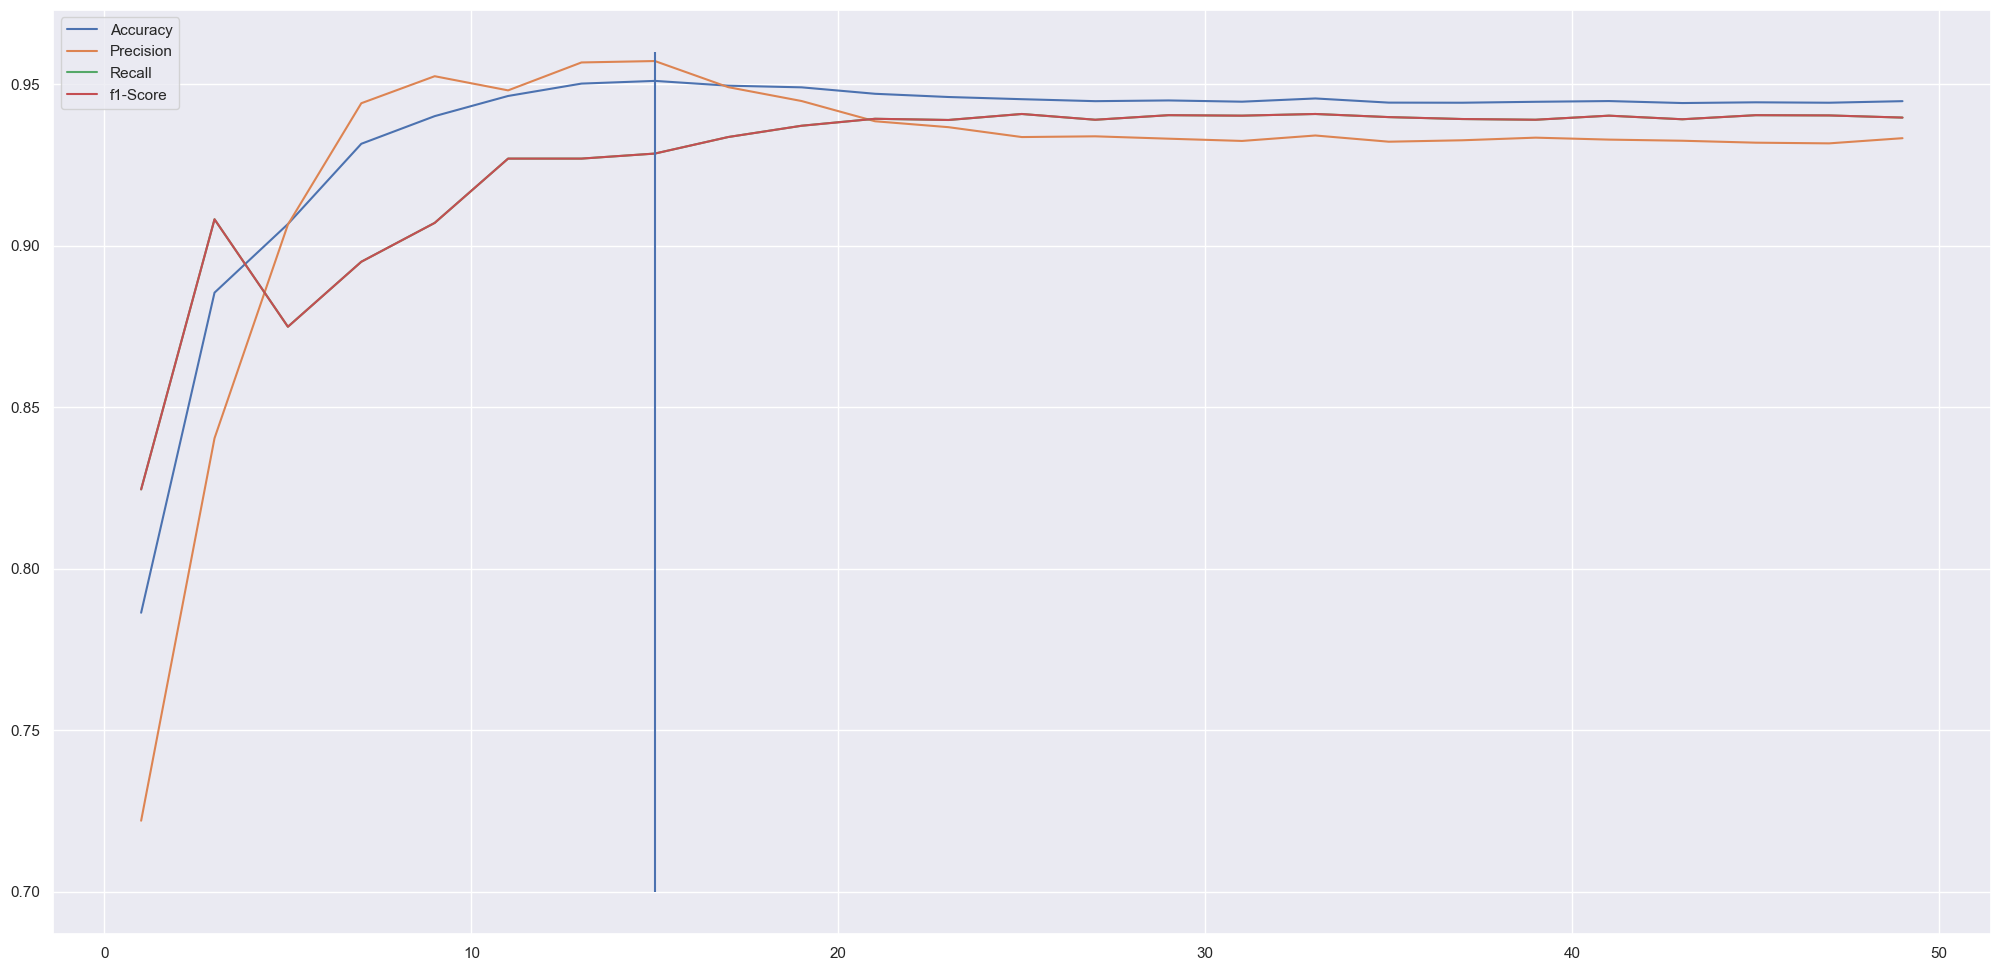

In [77]:
plt.plot(dt_results['max_depth'],dt_results['Accuracy'], label = 'Accuracy' )
plt.plot(dt_results['max_depth'],dt_results['Precision'], label = 'Precision' )
plt.plot(dt_results['max_depth'],dt_results['Recall'], label = 'Recall' )
plt.plot(dt_results['max_depth'],dt_results['Recall'], label = 'f1-Score' )
plt.legend()

best_max_depth = int(dt_results['max_depth'].loc[dt_results['f1-Score'] ==  dt_results['f1-Score'].max()])
plt.vlines(best_max_depth, ymin = 0.7, ymax=0.96)
